In [1]:
#Importar los datos
import os 
import pandas as pd
df = pd.read_csv('input/attacks.csv',encoding='latin-1')
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [2]:
#Limpiar las columnas duplicadas y los null
df_clean=df.drop(['Case Number.1', 'Case Number.2','href formula', 'Unnamed: 22','Unnamed: 23'], axis=1)

In [3]:
print(df_clean.columns.values)
len(df_clean.columns)

['Case Number' 'Date' 'Year' 'Type' 'Country' 'Area' 'Location' 'Activity'
 'Name' 'Sex ' 'Age' 'Injury' 'Fatal (Y/N)' 'Time' 'Species '
 'Investigator or Source' 'pdf' 'href' 'original order']


19

In [4]:
#Limpiar datos duplicados
df_clean=df_clean.drop_duplicates()

# Hipótesis 2:

#### A partir del año 2000, se han producido más del doble de ataques por tiburones a hombres que a mujeres realizando la misma actividad.



In [5]:
#Elegir para nuestro dataframe las columnas necesarias y filtrar por los años entre el 2000 y el 2018
df_cleanh2=df_clean[df_clean.Year >=2000][["Activity","Fatal (Y/N)","Sex ","Year"]]

df_cleanh2.head()

,Activity,Fatal (Y/N),Sex,Year
0,Paddling,N,F,2018.0
1,Standing,N,F,2018.0
2,Surfing,N,M,2018.0
3,Surfing,N,M,2018.0
4,Free diving,N,M,2018.0


In [6]:
df_cleanh2.Activity.value_counts().head(5)

Surfing         630
Swimming        282
Spearfishing    116
Fishing         114
Wading           77
Name: Activity, dtype: int64

In [7]:
df_cleanh2["Sex "].value_counts()

M      1630
F       341
M         2
lli       1
Name: Sex , dtype: int64

In [8]:
#Dividir las actividades en 8 grupos

activities= list(df_cleanh2.Activity.items())

In [9]:
import re
activities
for i in activities:
    ind=[i[0]]
    r1=re.findall(r'kite.*|Kite.*',str(i[1]))
    r2=re.findall(r'Fishing.*|.*fishing',str(i[1]))
    r3=re.findall(r'.*paddle.*|Paddle.*',str(i[1]))
    r4=re.findall(r'surf.*|Surf.*',str(i[1]))
    r5=re.findall(r'walk.*|Walk.*',str(i[1]))
    r6=re.findall(r'.*diving.*|.*Diving.*',str(i[1]))
    r7= re.findall(r'snork.*|Snork.*',str(i[1]))
    r8=re.findall(r'Swim.*|.*swim.*',str(i[1]))
    if r1:
        df_cleanh2["Activity"][ind]="Kite Surf"
    elif r2:
        df_cleanh2["Activity"][ind]="Fishing"
    elif r3:
        df_cleanh2["Activity"][ind]="Paddle Surf"
    elif r4:
        df_cleanh2["Activity"][ind]="Surf"
    elif r5:
        df_cleanh2["Activity"][ind]="Walking"
    elif r6:
        df_cleanh2["Activity"][ind]="Diving"
    elif r7:
        df_cleanh2["Activity"][ind]="Snorkle"
    elif r8:
        df_cleanh2["Activity"][ind]="Swimming"
    else:
        df_cleanh2["Activity"][ind]="Other"
    

/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/beatrizmedialdeamontes/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [10]:
df_cleanh2.head()

,Activity,Fatal (Y/N),Sex,Year
0,Other,N,F,2018.0
1,Other,N,F,2018.0
2,Surf,N,M,2018.0
3,Surf,N,M,2018.0
4,Diving,N,M,2018.0


In [11]:
df_cleanh2["Activity"].value_counts()  

Surf           713
Other          478
Fishing        329
Swimming       314
Diving         118
Snorkle         77
Kite Surf       20
Paddle Surf     17
Walking         12
Name: Activity, dtype: int64

In [12]:
#Seleccionar sólo los ataques fatales

df_h2=df_cleanh2[df_cleanh2["Fatal (Y/N)"]=="Y"][["Activity","Sex ","Year"]]
df_h2.head(10)

,Activity,Sex,Year
6,Swimming,M,2018.0
58,Diving,F,2017.0
59,Other,NaN,2017.0
64,Other,M,2017.0
91,Swimming,M,2017.0
144,Snorkle,M,2017.0
149,Other,M,2017.0
155,Surf,F,2017.0
174,Other,M,2017.0
221,Kite Surf,M,2016.0


In [13]:
df_h2["Sex "].value_counts()

M    139
F     21
Name: Sex , dtype: int64

In [14]:
#Limpiar valores nulos de nuestro propio df
df_h2 = df_h2.dropna(axis=0, subset=['Sex '])
df_h2.isnull().head()

,Activity,Sex,Year
6,False,False,False
58,False,False,False
64,False,False,False
91,False,False,False
144,False,False,False


,Female,Male
Diving,2.0,15.0
Fishing,1.0,20.0
Snorkle,5.0,7.0
Surf,2.0,27.0
Swimming,10.0,35.0
Walking,1.0,NaN
Kite Surf,NaN,3.0
Other,NaN,32.0


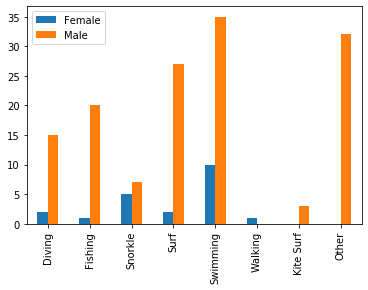

In [15]:
# Preparar los datos para crear la gráfica
%matplotlib inline
female= df_h2[df_h2["Sex "]=="F"].groupby("Activity").agg({"Year":"count"})
male= df_h2[df_h2["Sex "]=="M"].groupby("Activity").agg({"Year":"count"})


data = pd.concat([female,male], axis=1)
data.columns = ["Female","Male"]
display(data)
data.plot.bar()

In [16]:
df_h2["Activity"].describe()

count          160
unique           8
top       Swimming
freq            45
Name: Activity, dtype: object